In [27]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "./input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results  written to the current directory are saved as output.


Python version: 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.5.0
IPython version: 7.16.1
scikit-learn version: 0.23.1
-------------------------
propublica-violent-recidivism.csv



In [28]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [29]:
#import data from file
data_raw = pd.read_csv('./input/propublica-violent-recidivism.csv')


#to play with our data we'll create a copy
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1]


#preview data
print (data_raw.info()) 
data_raw.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4743 non-null   int64  
 1   name                     4743 non-null   object 
 2   first                    4743 non-null   object 
 3   last                     4743 non-null   object 
 4   compas_screening_date    4743 non-null   object 
 5   sex                      4743 non-null   object 
 6   dob                      4743 non-null   object 
 7   age                      4743 non-null   int64  
 8   age_cat                  4743 non-null   object 
 9   race                     4743 non-null   object 
 10  juv_fel_count            4743 non-null   int64  
 11  decile_score             4743 non-null   int64  
 12  juv_misd_count           4743 non-null   int64  
 13  juv_other_count          4743 non-null   int64  
 14  priors_count            

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
3325,7667,andrew abbott,andrew,abbott,2014-01-05,Male,1979-12-11,36,25 - 45,Caucasian,...,Low,2014-01-05,2014-01-04,2014-01-05,1,0,817,0,0,0
773,1730,arthur mcqueen,arthur,mcqueen,2014-03-04,Male,1968-08-25,47,Greater than 45,African-American,...,Low,2014-03-04,2014-03-03,2014-03-04,5,0,759,0,0,0
4652,10779,john scolo,john,scolo,2013-04-06,Male,1948-06-09,67,Greater than 45,Caucasian,...,Low,2013-04-06,2013-04-05,2013-04-06,1,0,1091,0,0,0
4021,9292,stephen mcnair,stephen,mcnair,2013-08-10,Male,1976-08-31,39,25 - 45,African-American,...,Medium,2013-08-10,2013-08-09,2013-12-06,4,118,965,0,0,0
4316,10006,korbin goodroad,korbin,goodroad,2013-09-14,Male,1995-04-21,20,Less than 25,Caucasian,...,High,2013-09-14,2015-01-07,2015-01-14,0,0,480,1,1,1
3455,8009,ralph bellamy,ralph,bellamy,2014-10-23,Male,1984-08-18,31,25 - 45,African-American,...,High,2014-10-23,2014-10-22,2014-10-24,13,1,439,1,1,1
915,2056,timothy bass,timothy,bass,2013-01-19,Male,1986-02-20,30,25 - 45,African-American,...,Low,2013-01-19,2013-01-18,2013-06-01,6,133,1168,0,0,0
663,1511,duane miller,duane,miller,2013-11-10,Male,1986-09-16,29,25 - 45,African-American,...,Low,2013-11-10,2013-11-09,2013-11-10,0,0,873,0,0,0
1601,3619,willie clark,willie,clark,2013-08-06,Male,1977-02-09,39,25 - 45,African-American,...,Low,2013-08-06,2013-09-18,2013-10-02,4,0,43,0,0,0
2479,5719,brushod goodrum,brushod,goodrum,2014-01-28,Male,1995-04-14,21,Less than 25,African-American,...,High,2014-01-28,2014-08-31,2014-09-17,1,0,215,0,0,0


In [30]:
features = [
    'sex',
    'age',
    'age_cat',
    'race',
    'juv_fel_count',
    'decile_score',
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
    'c_days_from_compas',
    'c_charge_degree',
    'c_charge_desc',
    'is_recid',
    'score_text',
    'v_score_text',
    'two_year_recid'
]
data1 = data1[features]

In [31]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)


data_raw.describe(include = 'all')

Train columns with null values:
 sex                    0
age                    0
age_cat                0
race                   0
juv_fel_count          0
decile_score           0
juv_misd_count         0
juv_other_count        0
priors_count           0
c_days_from_compas    11
c_charge_degree        0
c_charge_desc         17
is_recid               0
score_text             5
v_score_text           0
two_year_recid         0
dtype: int64
----------


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
count,4743.000000,4743,4743,4743,4743,4743,4743,4743.000000,4743,4743,...,4743,4743,4534,4534,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
unique,NaN,4721,2114,2897,586,2,3978,NaN,3,6,...,3,586,1003,1012,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ronald shelton,michael,williams,2013-09-23,Male,1983-02-03,NaN,25 - 45,African-American,...,Low,2013-09-23,2014-01-04,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,95,49,24,3746,4,NaN,2699,2266,...,3389,24,19,27,NaN,NaN,NaN,NaN,NaN,NaN
mean,5454.230445,NaN,NaN,NaN,NaN,NaN,NaN,36.002952,NaN,NaN,...,NaN,NaN,NaN,NaN,2.677209,9.084124,730.143369,0.165507,0.163399,0.163399
std,3189.515451,NaN,NaN,NaN,NaN,NaN,NaN,12.200715,NaN,NaN,...,NaN,NaN,NaN,NaN,4.084277,36.867544,365.435158,0.371677,0.369768,0.369768
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2631.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,422.500000,0.000000,0.000000,0.000000
50%,5475.000000,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,0.000000,837.000000,0.000000,0.000000,0.000000
75%,8239.500000,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,1.000000,1039.000000,0.000000,0.000000,0.000000


In [34]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
data1['c_days_from_compas'].fillna(0, inplace = True)
#complete embarked with mode
data1['c_charge_desc'].fillna(dataset['c_charge_desc'].mode()[0], inplace = True)
#complete missing fare with median
data1['score_text'].fillna(dataset['score_text'].mode()[0], inplace = True)

# drop_column = ['id']
# data1.drop(drop_column,  axis=1, inplace=True)    

print(data1.isnull().sum())
print("-"*10)
    

sex                   0
age                   0
age_cat               0
race                  0
juv_fel_count         0
decile_score          0
juv_misd_count        0
juv_other_count       0
priors_count          0
c_days_from_compas    0
c_charge_degree       0
c_charge_desc         0
is_recid              0
score_text            0
v_score_text          0
two_year_recid        0
dtype: int64
----------


In [35]:
print (data1.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 4743 non-null   object 
 1   age                 4743 non-null   int64  
 2   age_cat             4743 non-null   object 
 3   race                4743 non-null   object 
 4   juv_fel_count       4743 non-null   int64  
 5   decile_score        4743 non-null   int64  
 6   juv_misd_count      4743 non-null   int64  
 7   juv_other_count     4743 non-null   int64  
 8   priors_count        4743 non-null   int64  
 9   c_days_from_compas  4743 non-null   float64
 10  c_charge_degree     4743 non-null   object 
 11  c_charge_desc       4743 non-null   object 
 12  is_recid            4743 non-null   int64  
 13  score_text          4743 non-null   object 
 14  v_score_text        4743 non-null   object 
 15  two_year_recid      4743 non-null   int64  
dtypes: flo

In [40]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
data1['sex_code'] = label.fit_transform(data1['sex'])
data1['age_cat_code'] = label.fit_transform(data1['age_cat'])
data1['race_code'] = label.fit_transform(data1['race'])
data1['c_charge_degree_code'] = label.fit_transform(data1['c_charge_degree'])
data1['c_charge_desc_code'] = label.fit_transform(data1['c_charge_desc'])
data1['score_text_code'] = label.fit_transform(data1['score_text'])
data1['v_score_text_code'] = label.fit_transform(data1['v_score_text'])


#define y variable aka target/outcome
Target = ['two_year_recid']

#define x variables for original features aka feature selection
data1_x = features[:-1]
data1_x_calc = [
    'sex_code',
    'age',
    'age_cat_code',
    'race_code',
    'juv_fel_count',
    'decile_score',
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
    'c_days_from_compas',
    'c_charge_degree_code',
    'c_charge_desc_code',
    'is_recid',
    'score_text_code', 
    'v_score_text_code',
] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')



Original X Y:  ['two_year_recid', 'sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'score_text', 'v_score_text'] 



In [41]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

Train columns with null values: 
 sex                     0
age                     0
age_cat                 0
race                    0
juv_fel_count           0
decile_score            0
juv_misd_count          0
juv_other_count         0
priors_count            0
c_days_from_compas      0
c_charge_degree         0
c_charge_desc           0
is_recid                0
score_text              0
v_score_text            0
two_year_recid          0
sex_code                0
age_cat_code            0
race_code               0
c_charge_degree_code    0
c_charge_desc_code      0
score_text_code         0
v_score_text_code       0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   4743 non-null   object 
 1   age                   4743 non-null   int64  
 2   age_cat               4743 n

In [43]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], test_size=0.25, random_state = 0)
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))
train1_x.head()

Data1 Shape: (4743, 23)
Train1 Shape: (3557, 15)
Test1 Shape: (1186, 15)


,sex_code,age,age_cat_code,race_code,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_days_from_compas,c_charge_degree_code,c_charge_desc_code,is_recid,score_text_code,v_score_text_code
2310,1,39,0,2,0,3,0,0,5,21.0,0,53,0,1,1
527,0,37,0,0,0,7,0,0,3,1.0,0,285,0,2,1
2948,1,55,1,2,0,2,0,0,1,17.0,1,34,0,1,1
2666,1,37,0,0,0,6,0,0,6,552.0,1,34,0,2,2
3862,1,27,0,0,0,4,0,0,1,1.0,0,20,1,1,2


In [44]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('two_year_recid Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

two_year_recid Correlation by: sex
      sex  two_year_recid
0  Female        0.098295
1    Male        0.180726
---------- 

two_year_recid Correlation by: age
    age  two_year_recid
0    18        1.000000
1    19        0.916667
2    20        0.354430
3    21        0.267380
4    22        0.197674
..  ...             ...
58   76        0.000000
59   77        0.250000
60   79        0.000000
61   80        0.000000
62   83        0.000000

[63 rows x 2 columns]
---------- 

two_year_recid Correlation by: age_cat
           age_cat  two_year_recid
0          25 - 45        0.177103
1  Greater than 45        0.074423
2     Less than 25        0.240000
---------- 

two_year_recid Correlation by: race
               race  two_year_recid
0  African-American        0.207855
1             Asian        0.148148
2         Caucasian        0.122869
3          Hispanic        0.115721
4   Native American        0.272727
5             Other        0.125000
---------- 

two_year_recid Correla

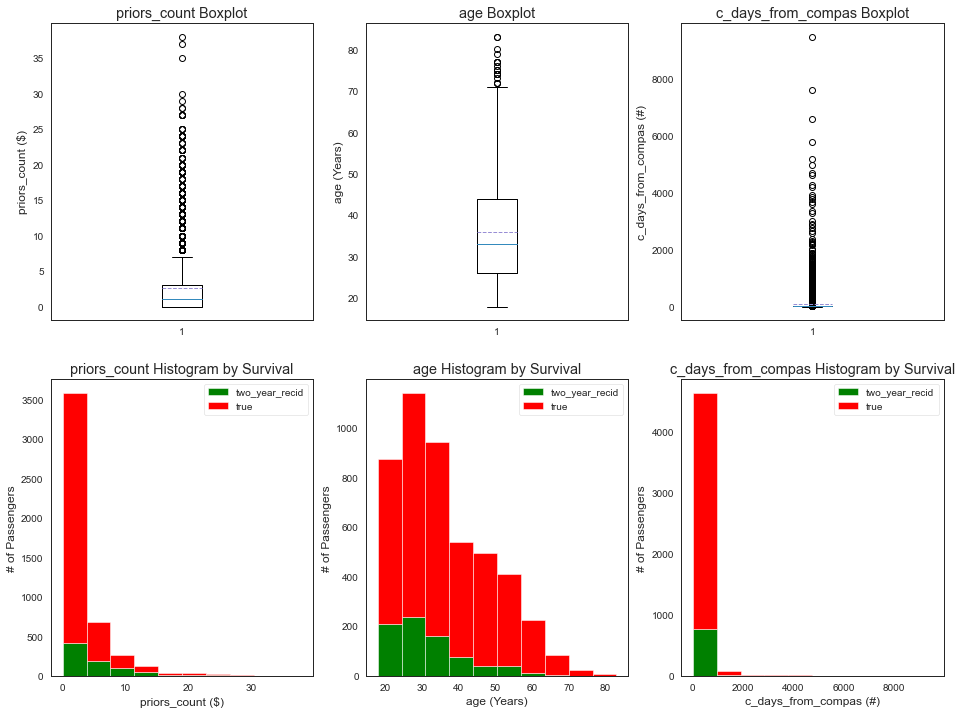

In [46]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['priors_count'], showmeans = True, meanline = True)
plt.title('priors_count Boxplot')
plt.ylabel('priors_count ($)')

plt.subplot(232)
plt.boxplot(data1['age'], showmeans = True, meanline = True)
plt.title('age Boxplot')
plt.ylabel('age (Years)')

plt.subplot(233)
plt.boxplot(data1['c_days_from_compas'], showmeans = True, meanline = True)
plt.title('c_days_from_compas Boxplot')
plt.ylabel('c_days_from_compas (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['two_year_recid']==1]['priors_count'], data1[data1['two_year_recid']==0]['priors_count']], 
         stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
plt.title('priors_count Histogram by Survival')
plt.xlabel('priors_count ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['two_year_recid']==1]['age'], data1[data1['two_year_recid']==0]['age']], 
         stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
plt.title('age Histogram by Survival')
plt.xlabel('age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['two_year_recid']==1]['c_days_from_compas'], data1[data1['two_year_recid']==0]['c_days_from_compas']], 
         stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
plt.title('c_days_from_compas Histogram by Survival')
plt.xlabel('c_days_from_compas (#)')
plt.ylabel('# of Passengers')
plt.legend()

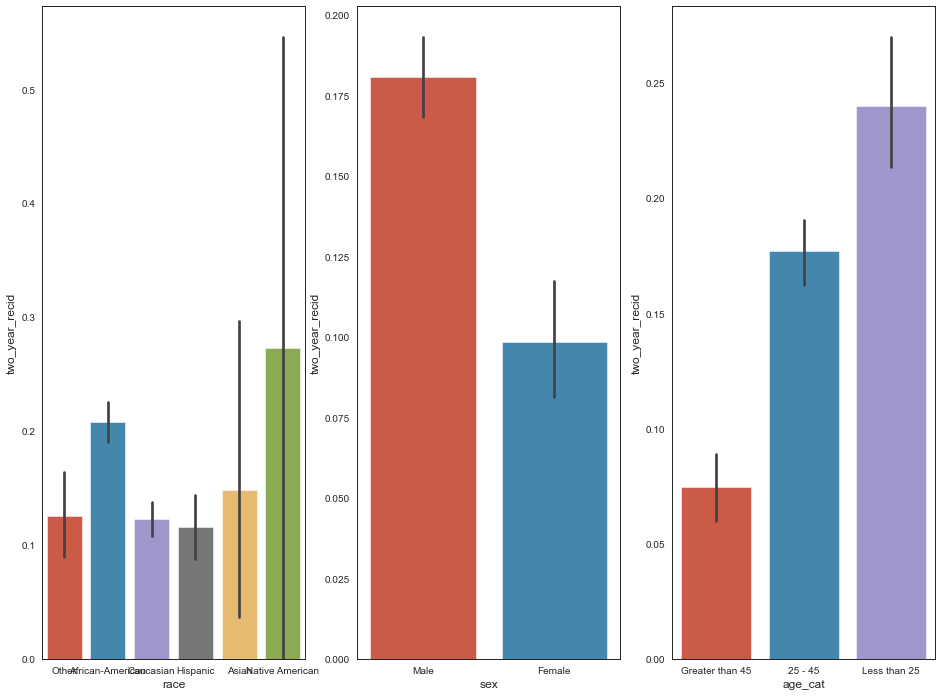

In [54]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3,figsize=(16,12))

sns.barplot(x = 'race', y = 'two_year_recid', data=data1, ax = axis1)
sns.barplot(x = 'sex', y = 'two_year_recid',  data=data1, ax = axis2)
sns.barplot(x = 'age_cat', y = 'two_year_recid', data=data1, ax = axis3)



Text(0.5, 1.0, 'sex vs score_text_code two_year_recid Comparison')

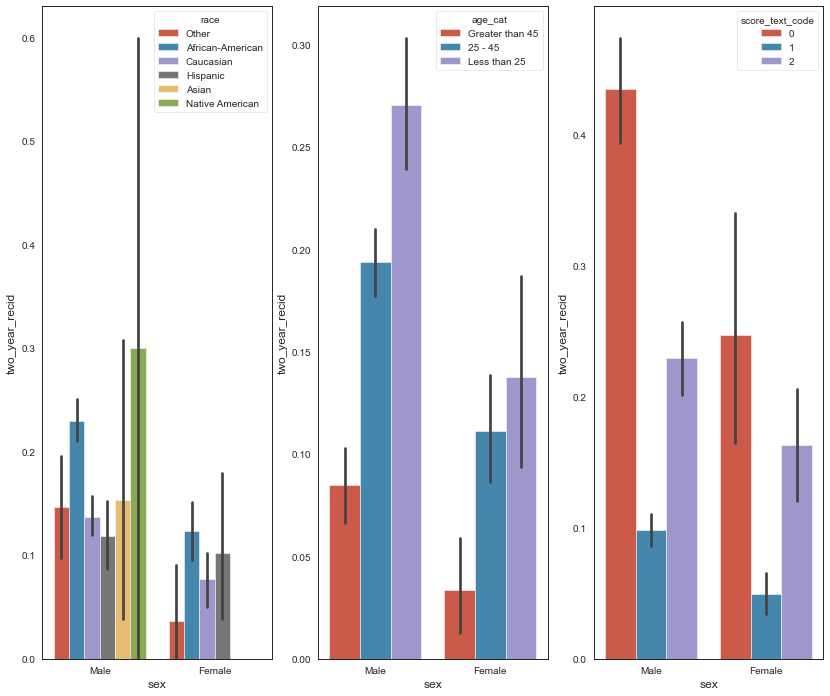

In [55]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'race', data=data1, ax = qaxis[0])
axis1.set_title('sex vs race two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'age_cat', data=data1, ax  = qaxis[1])
axis1.set_title('sex vs age_cat two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'score_text_code', data=data1, ax  = qaxis[2])
axis1.set_title('sex vs score_text_code two_year_recid Comparison')


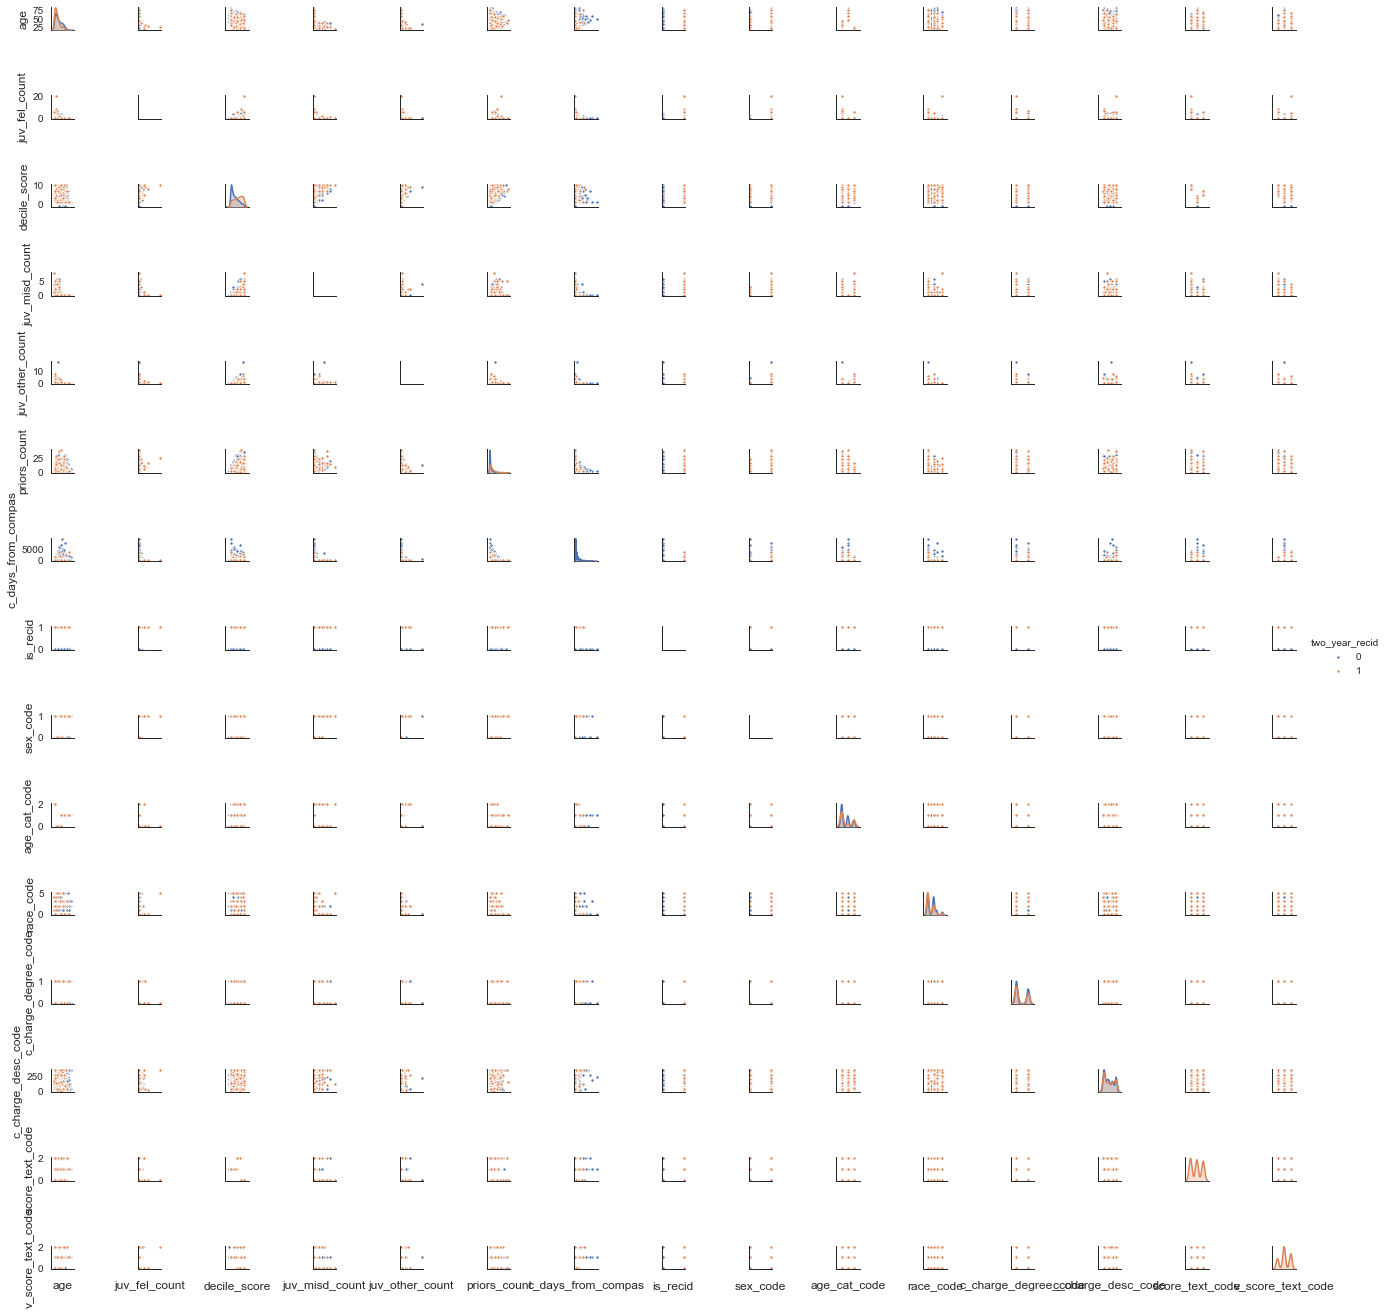

In [56]:
pp = sns.pairplot(data1, hue = 'two_year_recid', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

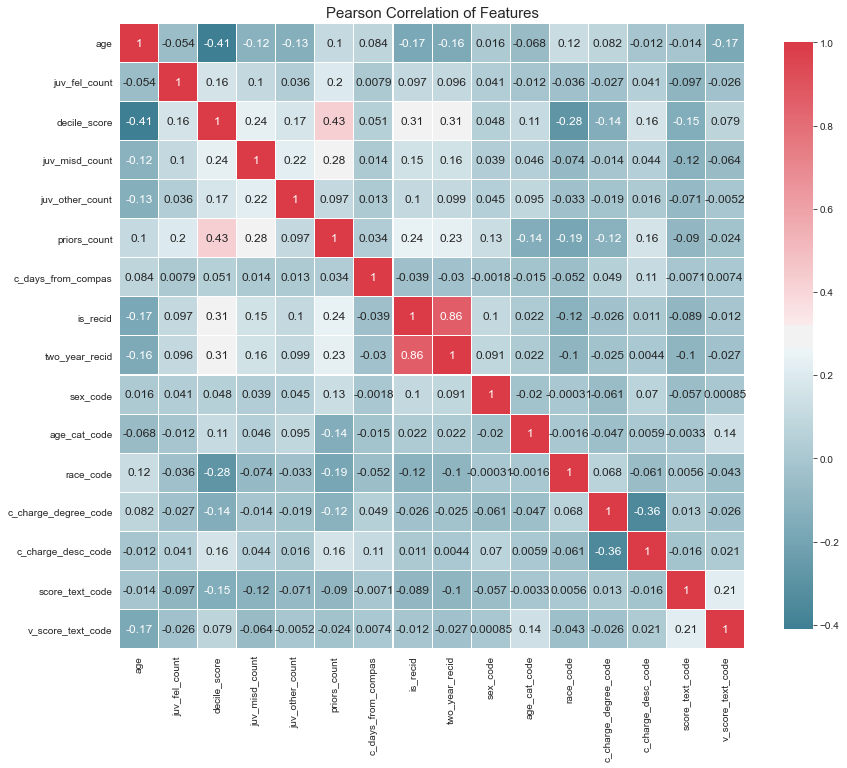

In [57]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [61]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
#     ensemble.AdaBoostClassifier(),
#     ensemble.BaggingClassifier(),
#     ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
#     tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
#     XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, data1[data1_x_calc], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_calc], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_calc])
    
    row_index+=1

    
#print and sort table:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.953427,0.952776,0.0138502,1.78885
5,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.952091,0.952495,0.0128307,0.00441651
0,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.962109,0.95137,0.0126774,0.19588
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999895,0.944483,0.0150557,0.16702
4,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.942285,0.942235,0.0172514,0.00547113
8,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.926221,0.927196,0.0987053,0.133521
9,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.999895,0.926915,0.0245135,0.00554445
7,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.836028,0.836543,0.0235933,0.624852
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.867452,0.829445,0.0173093,0.00816562
2,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.997153,0.801195,0.0309622,7.70031


Text(0, 0.5, 'Algorithm')

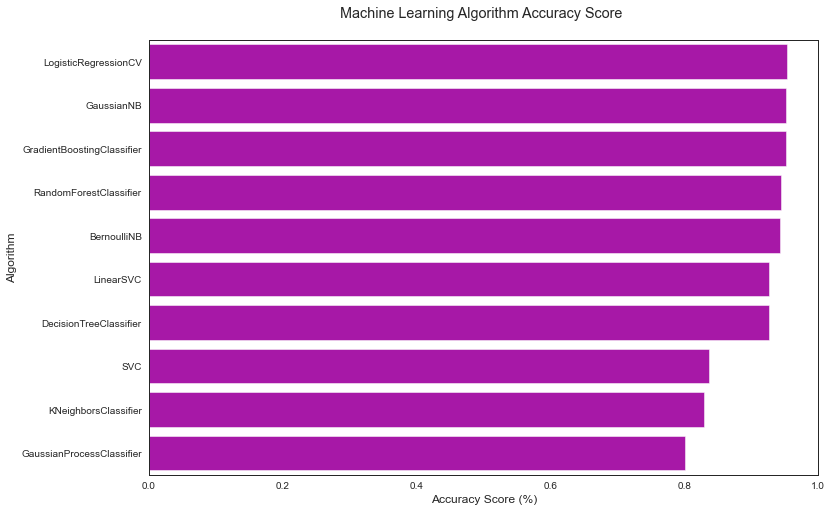

In [62]:

sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [ ]:
# pick candidate model to analysis its confusion matrix under two subgroups:
    # caucassian women
    # african_america men
    
# try Feldman algorithm to preprocess method first; re-run the model; compare whether the bias has been eliminated

